<a href="https://colab.research.google.com/github/zaki391/Code-Soft/blob/main/Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
#import rasterio
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import SelectKBest










In [2]:
data =  pd.read_csv("/content/archive (3).zip")

In [3]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.isna().sum().sum()

866

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe().apply(lambda s: s.apply('{0:.4f}'.format))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [8]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
data.dropna().count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

<Axes: xlabel='Name'>

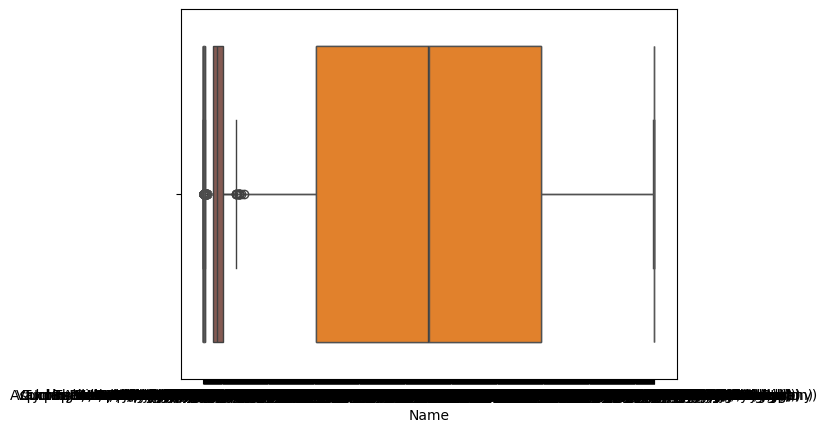

In [17]:
#target varaible
sns.boxplot(data  = data, x= data.Name )
sns.boxplot(data  = data, x= data.PassengerId	 )
sns.boxplot(data  = data, x= data.Survived	 )
sns.boxplot(data  = data, x= data.Pclass	 )
sns.boxplot(data  = data, x= data.Sex)
sns.boxplot(data  = data, x= data.Age	 )
sns.boxplot(data  = data, x= data.SibSp	)
sns.boxplot(data  = data, x= data.Parch	)



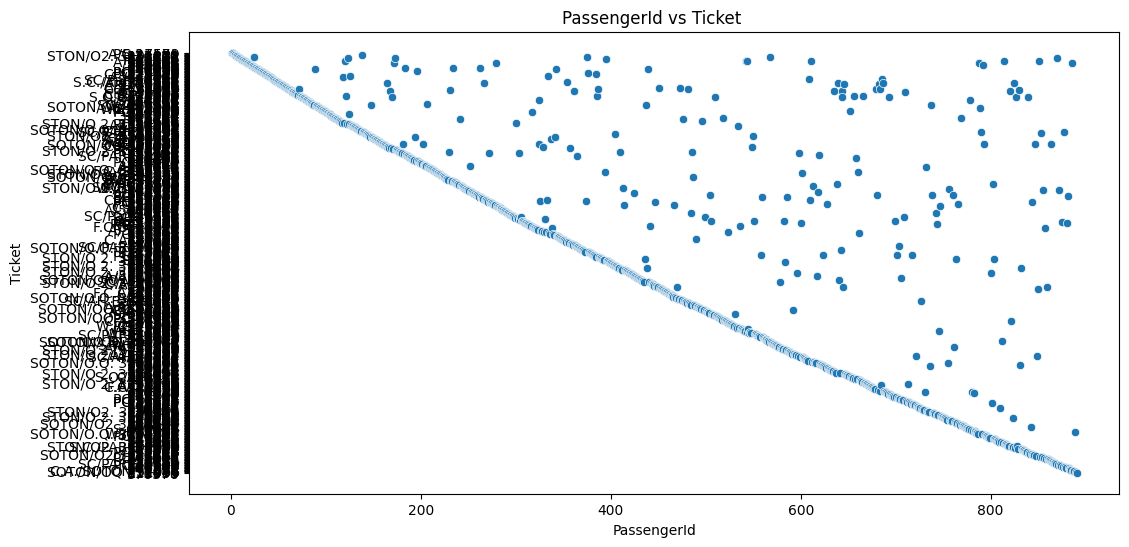

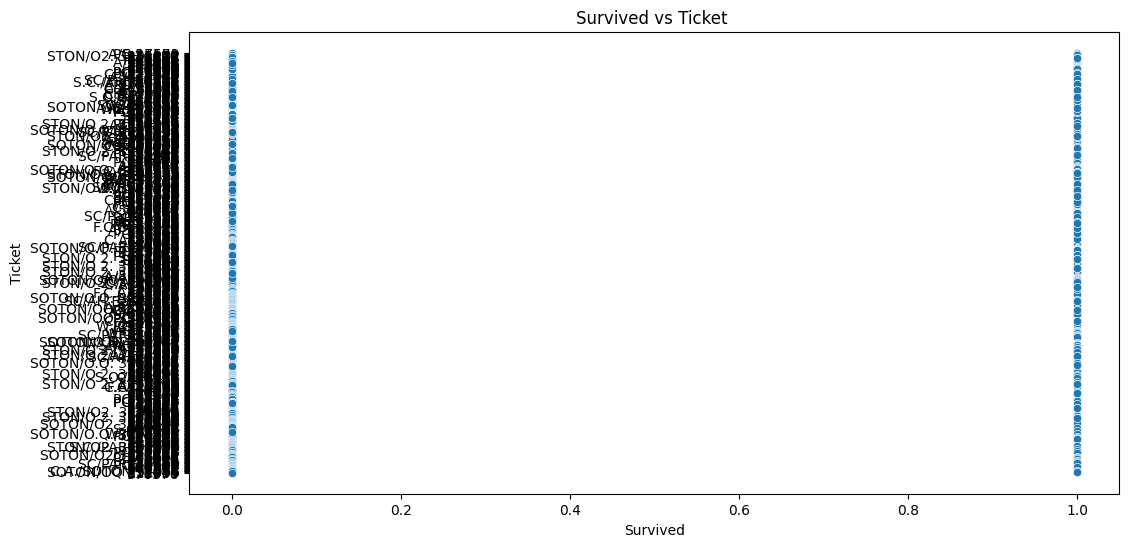

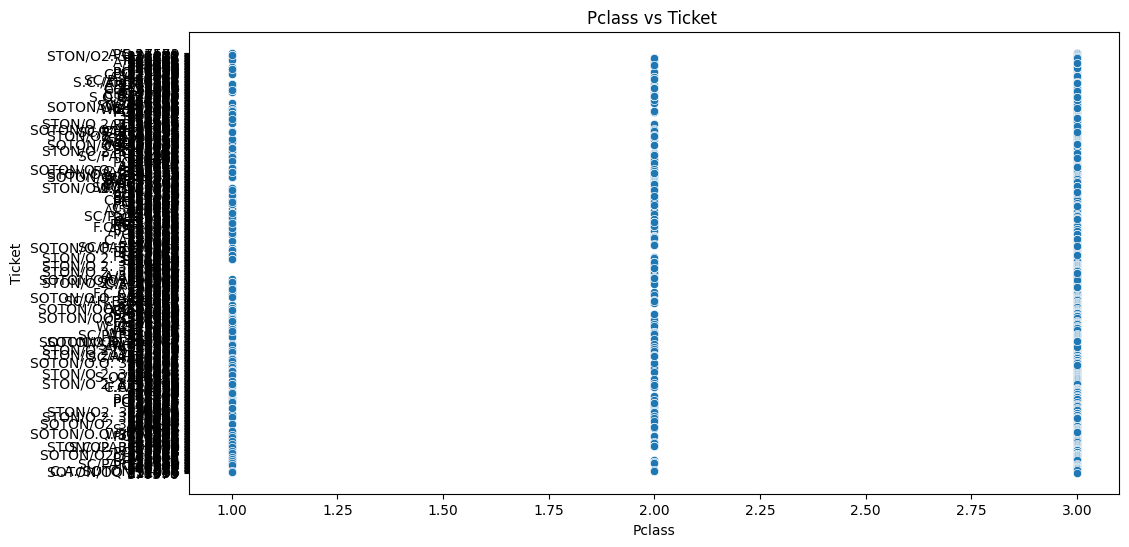

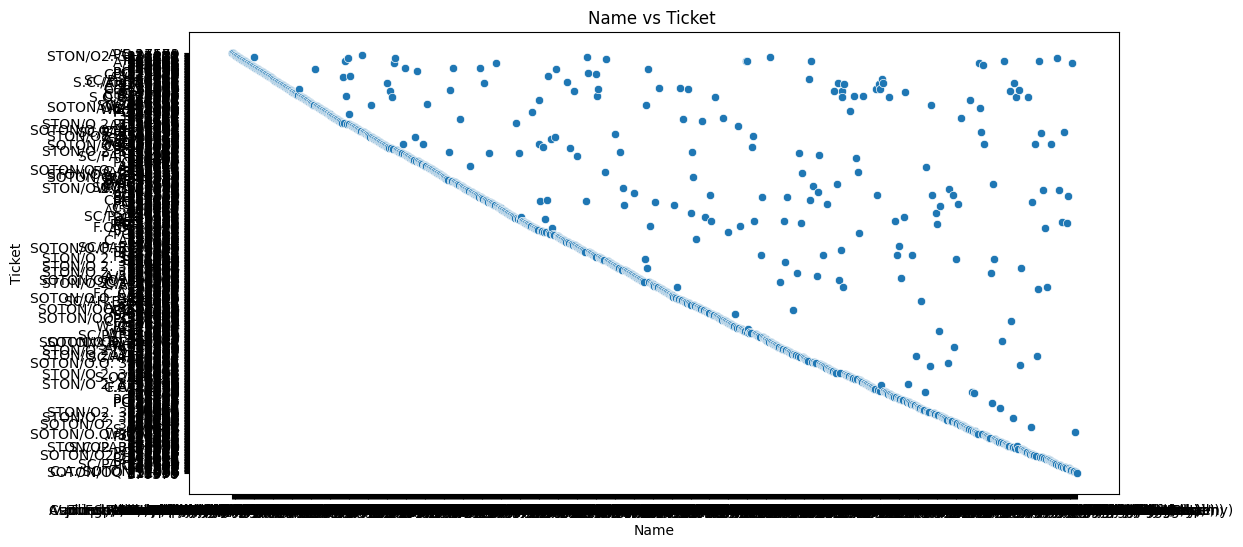

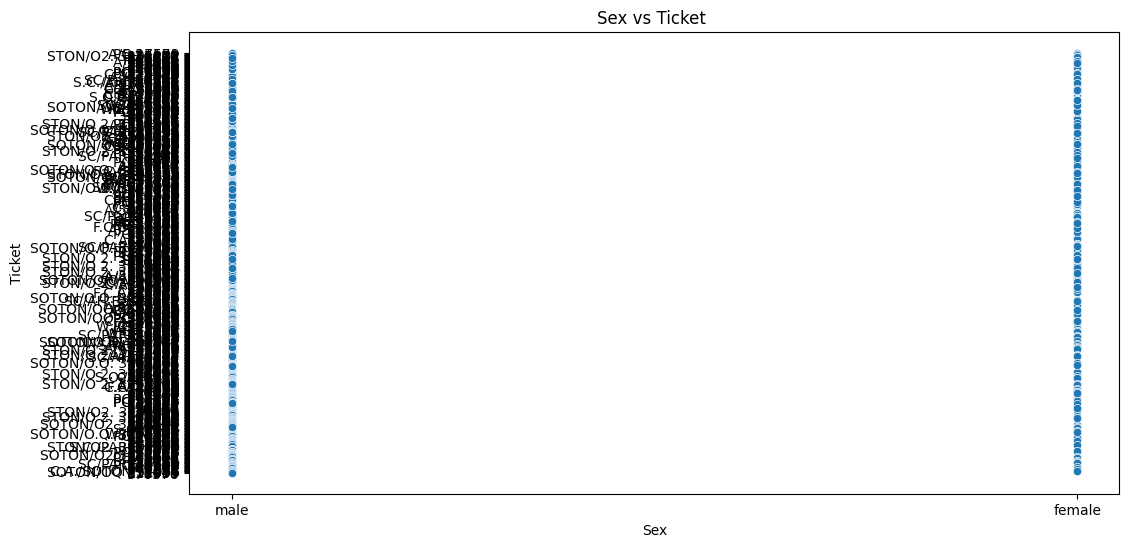

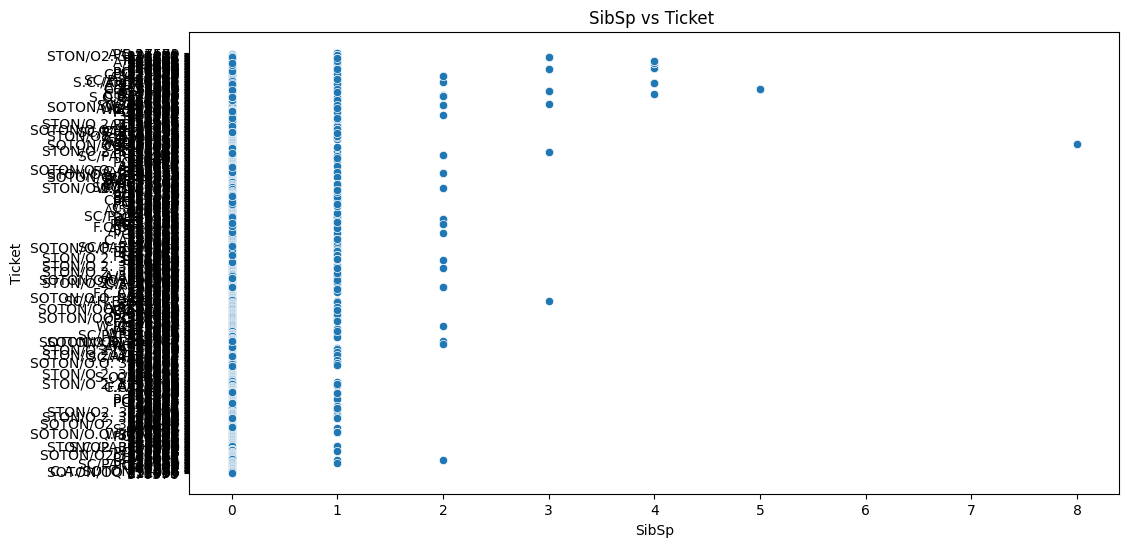

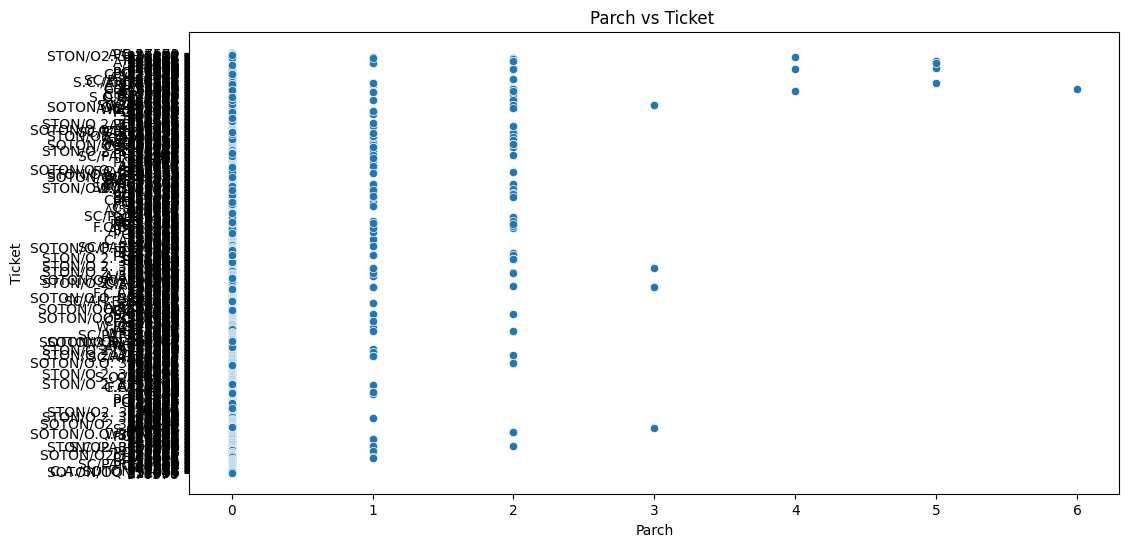

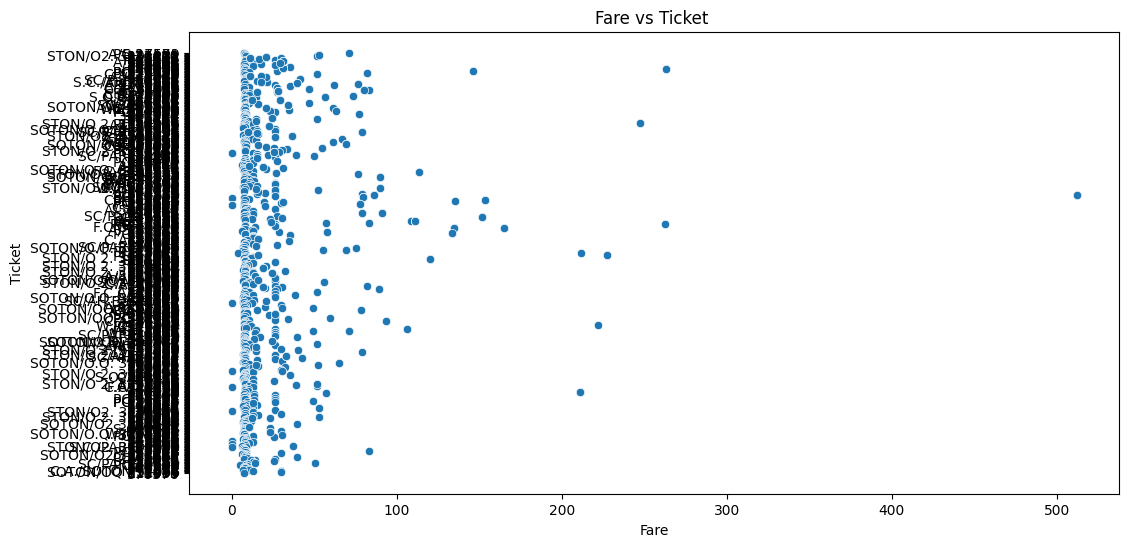

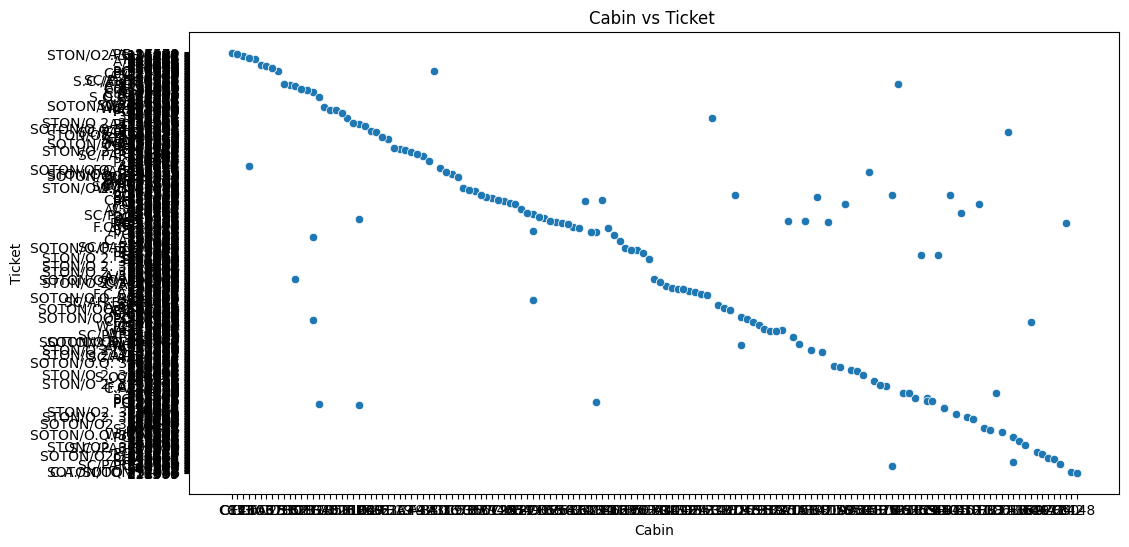

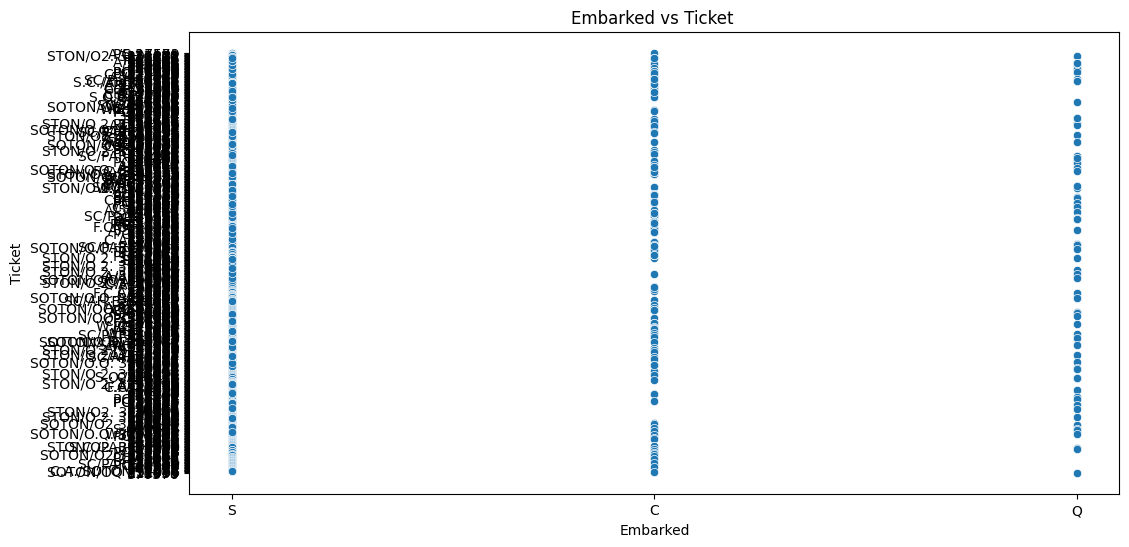

In [19]:
## scatter plot
for col in data.columns:
    if col in ['Age','Ticket']:
        continue
    plt.figure(figsize =(12,6))
    ax= sns.scatterplot(data = data,x = data[col] ,y = data.Ticket)
    ax.set_title("{} vs Ticket ".format(col))
    plt.show()

In [22]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Display the first few rows of the preprocessed dataset
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [23]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data= pd.read_csv('/content/archive (3).zip')

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.80
Precision: 0.76
Recall: 0.74
F1 Score: 0.75


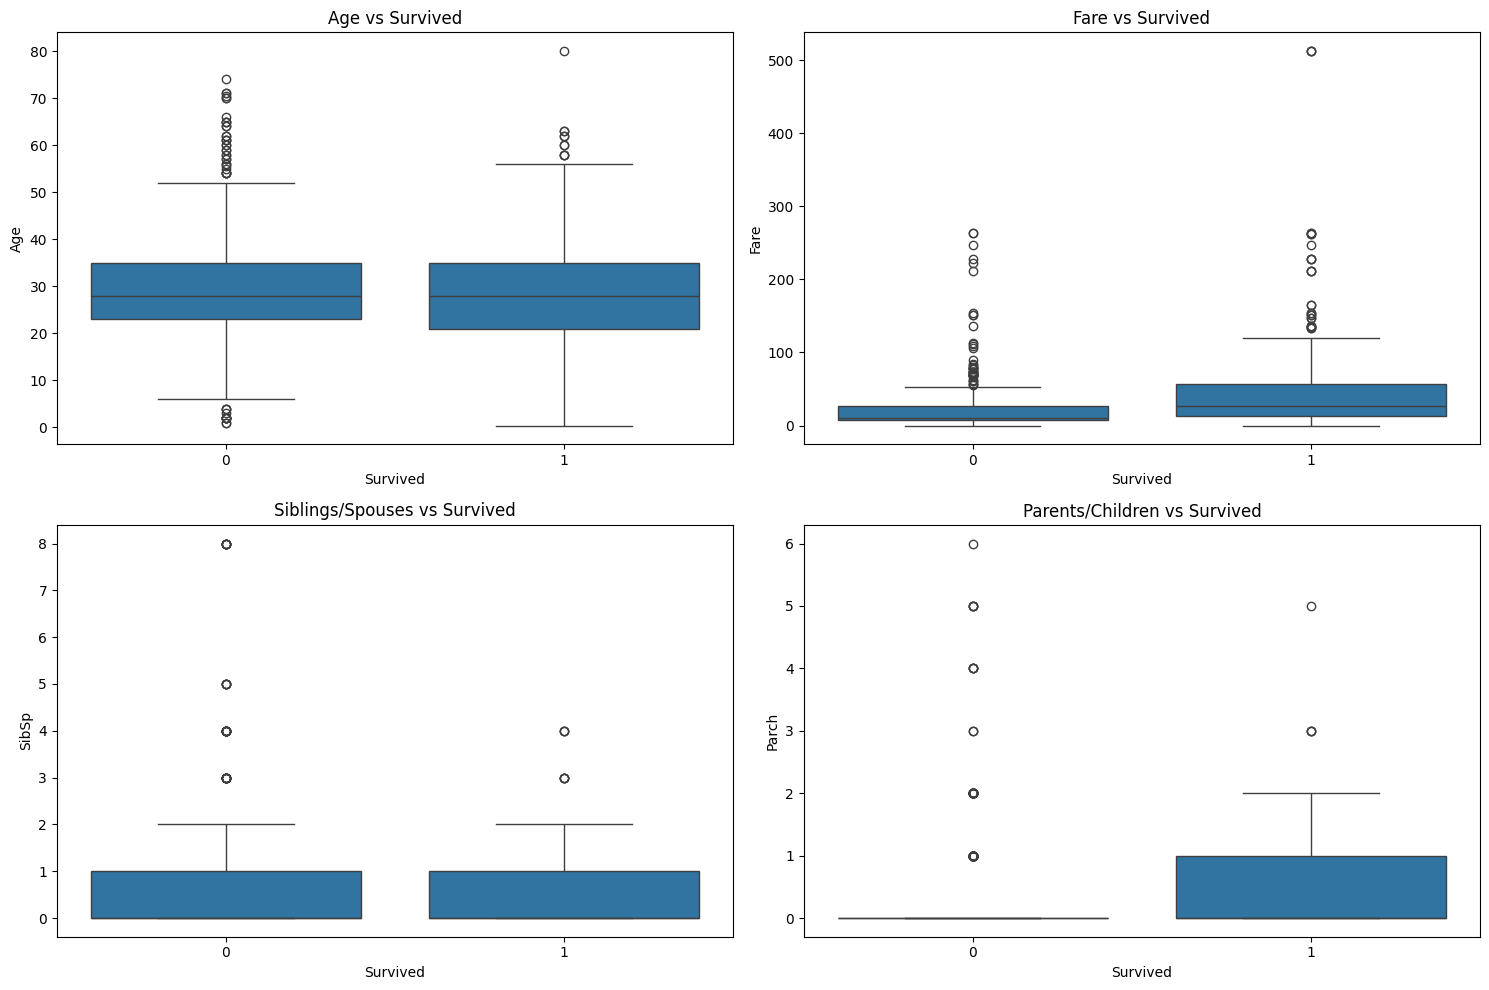

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
datac = pd.read_csv('/content/archive (3).zip')

# Fill missing values
datac['Age'].fillna(datac['Age'].median(), inplace=True)
datac['Cabin'].fillna('Unknown', inplace=True)
datac['Embarked'].fillna(datac['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
datac['Sex'] = datac['Sex'].map({'male': 0, 'female': 1})
datac = pd.get_dummies(datac, columns=['Embarked'], drop_first=True) # Use 'datac' instead of 'data'

# Drop irrelevant columns
datac.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Plotting box plots
plt.figure(figsize=(15, 10))

# Age box plot
plt.subplot(2, 2, 1)
sns.boxplot(x='Survived', y='Age', data=datac) # Use 'datac' instead of 'data'
plt.title('Age vs Survived')

# Fare box plot
plt.subplot(2, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=datac) # Use 'datac' instead of 'data'
plt.title('Fare vs Survived')

# SibSp box plot
plt.subplot(2, 2, 3)
sns.boxplot(x='Survived', y='SibSp', data=datac) # Use 'datac' instead of 'data'
plt.title('Siblings/Spouses vs Survived')

# Parch box plot
plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Parch', data=datac) # Use 'datac' instead of 'data'
plt.title('Parents/Children vs Survived')

plt.tight_layout()
plt.show()

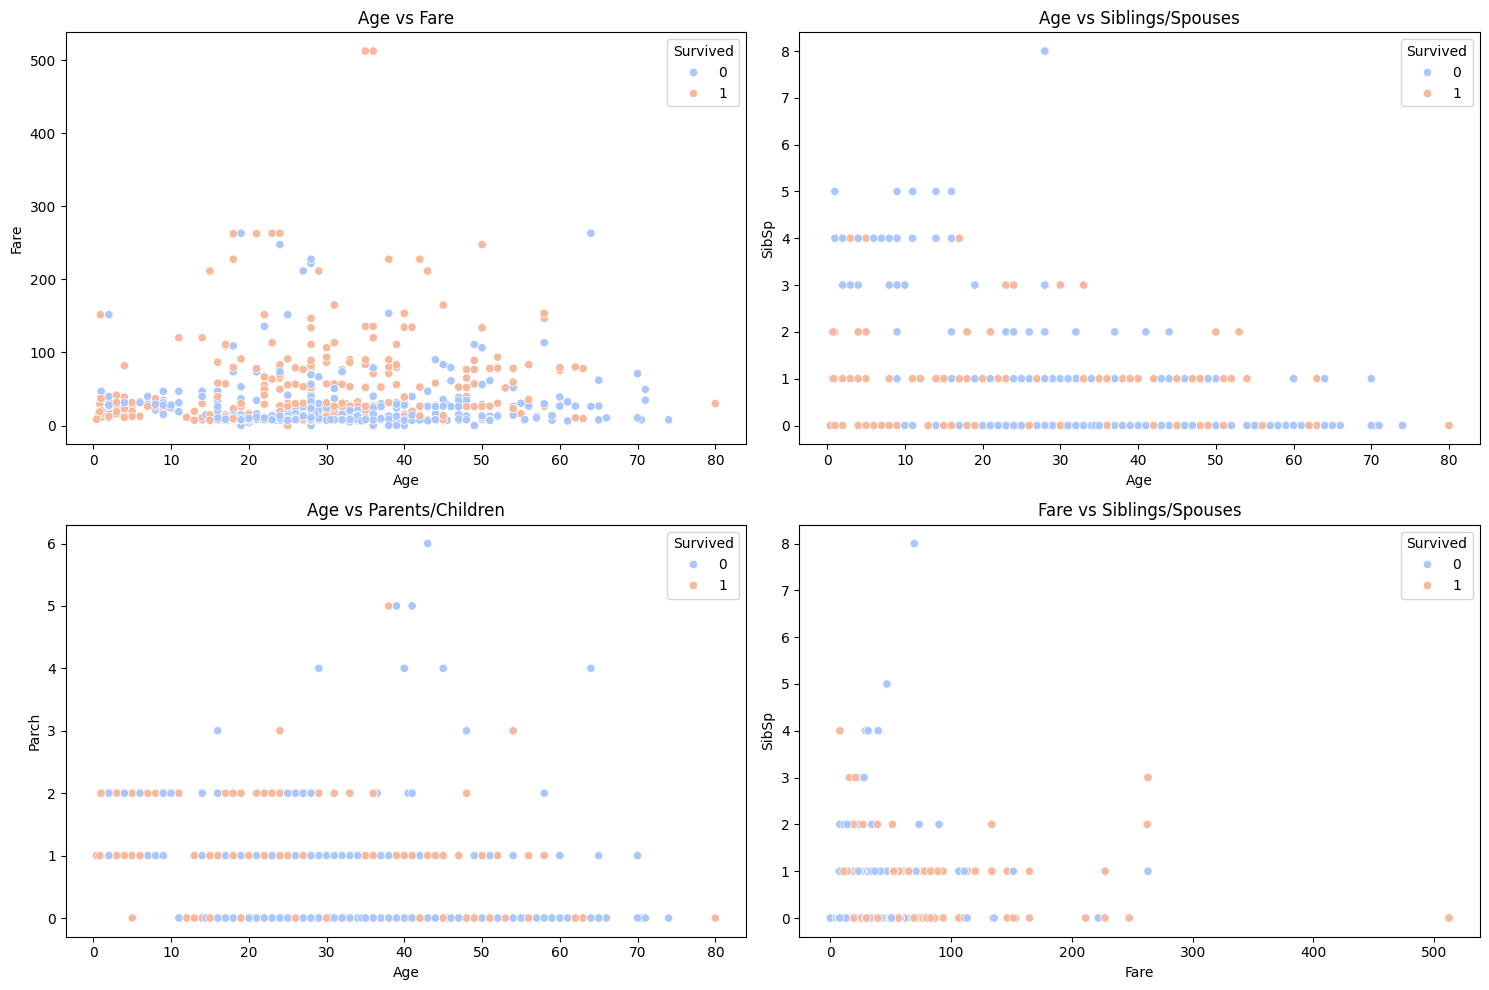

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/archive (3).zip')

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Plotting scatter plots
plt.figure(figsize=(15, 10))

# Age vs Fare scatter plot
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Fare')

# Age vs SibSp scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='SibSp', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Siblings/Spouses')

# Age vs Parch scatter plot
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Parch', hue='Survived', data=data, palette='coolwarm')
plt.title('Age vs Parents/Children')

# Fare vs SibSp scatter plot
plt.subplot(2, 2, 4)
sns.scatterplot(x='Fare', y='SibSp', hue='Survived', data=data, palette='coolwarm')
plt.title('Fare vs Siblings/Spouses')

plt.tight_layout()
plt.show()


In [34]:
# Create a sample pivot table or dataframe for demonstration
import pandas as pd
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
pivot = pd.DataFrame(data)

print(type(pivot))

<class 'pandas.core.frame.DataFrame'>


<ipython-input-36-140d4d1f50a2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10(pclass)['Fare'], y=top10(pclass)['Sex'], ax=ax, palette='Blues_d')
<ipython-input-36-140d4d1f50a2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10(pclass)['Fare'], y=top10(pclass)['Sex'], ax=ax, palette='Blues_d')
<ipython-input-36-140d4d1f50a2>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10(pclass)['Fare'], y=top10(pclass)['Sex'], ax=ax, palette='Blues_d')


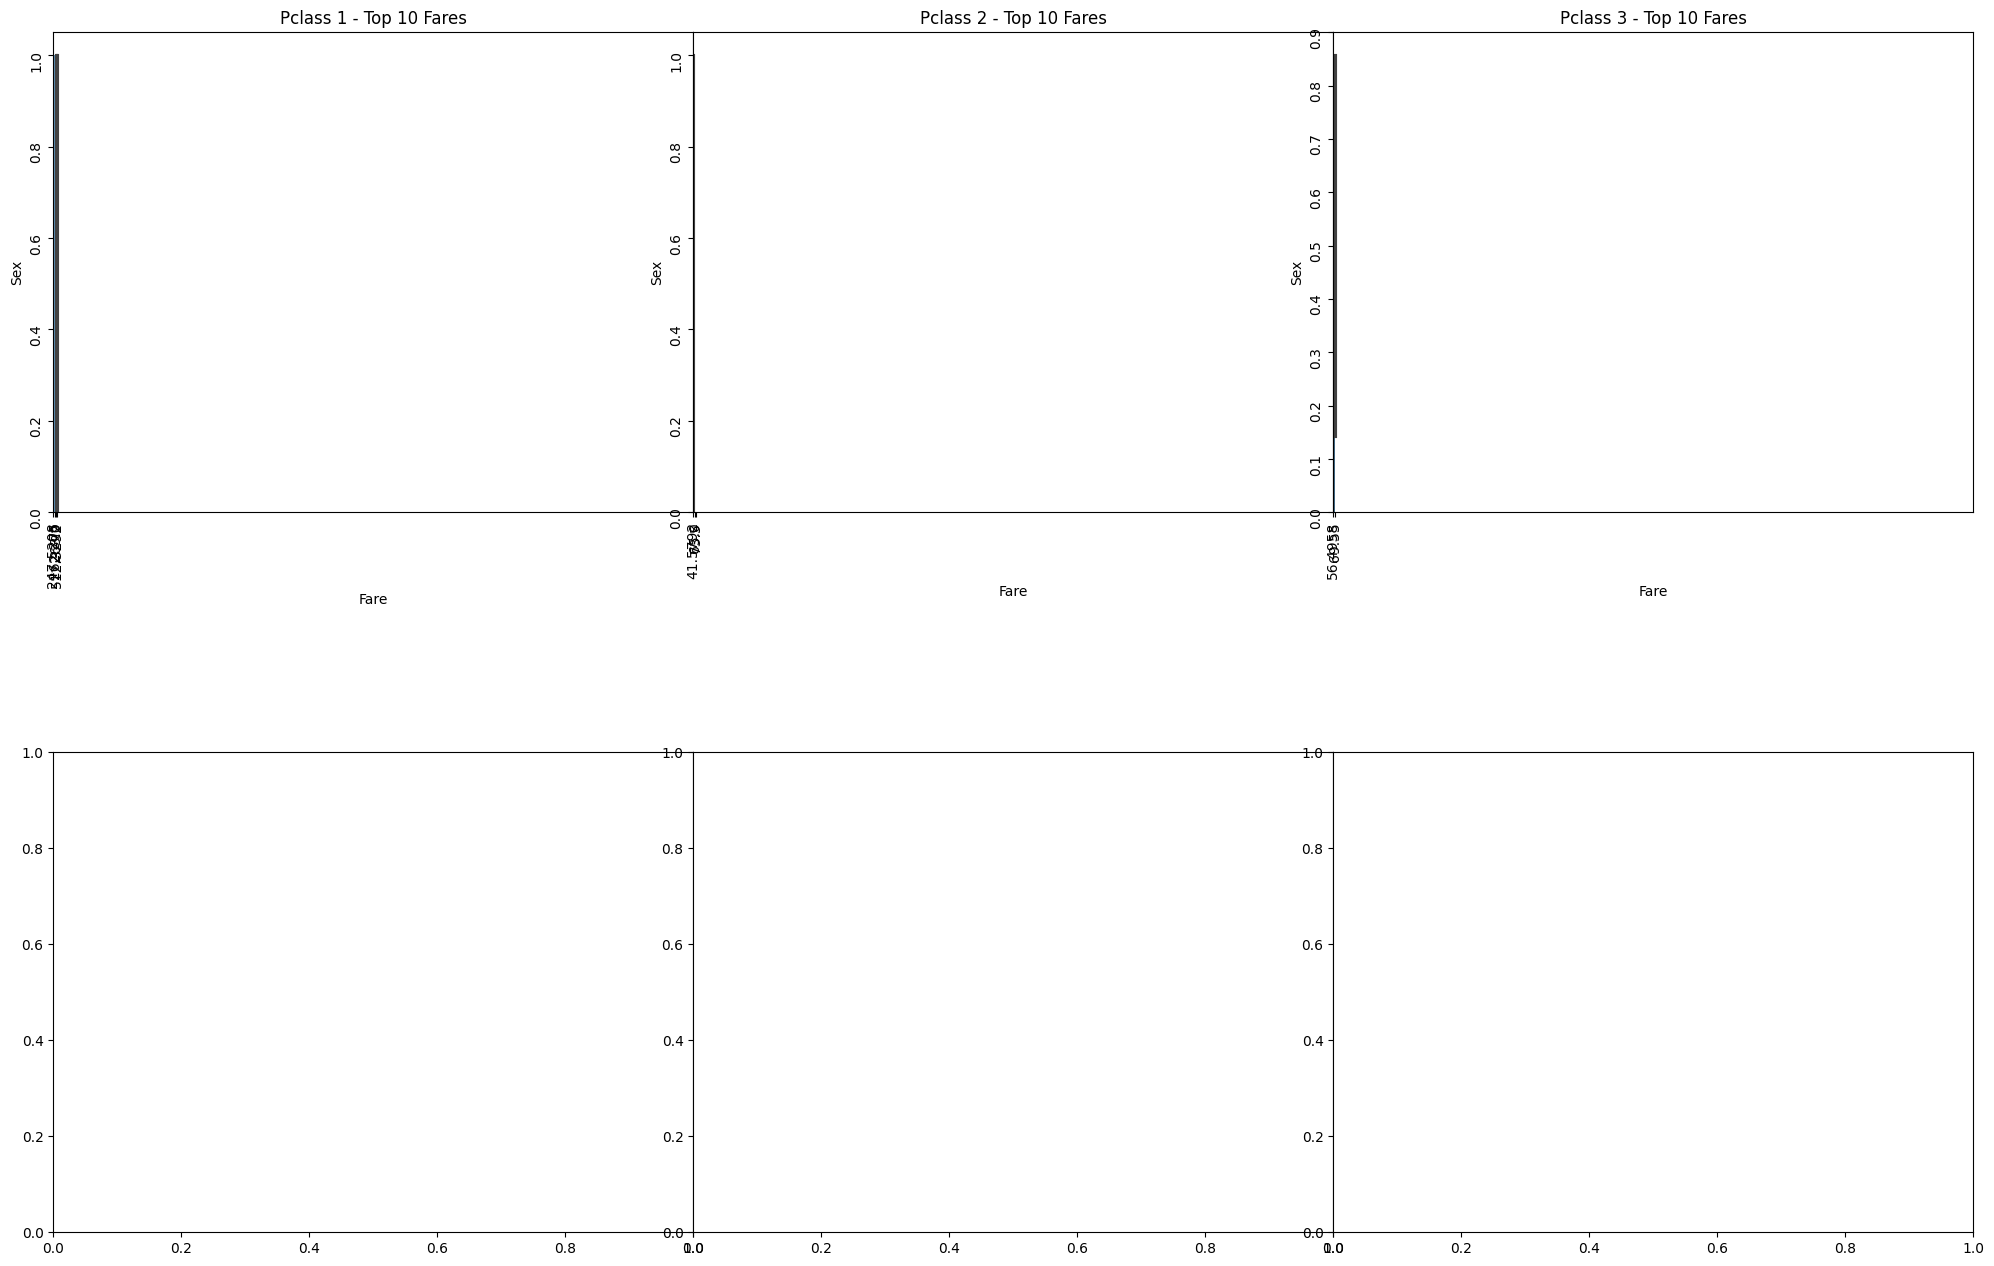

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = '/content/archive (3).zip'
data = pd.read_csv(data)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Let's assume we want to plot top 10 and bottom 10 fares for each 'Pclass'
def top10(pclass):
    return data[data['Pclass'] == pclass].sort_values(by='Fare', ascending=False).head(10)

def bottom10(pclass):
    return data[data['Pclass'] == pclass].sort_values(by='Fare').head(10)

# Get unique passenger classes
classes = sorted(data['Pclass'].unique())

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))
plt.subplots_adjust(left=0.2, bottom=0, right=1, top=1, wspace=0, hspace=0.5)

# Loop through each class and plot the top 10 and bottom 10 fares
for ax, pclass in zip(axs.ravel(), classes):
    # Plot top 10 fares
    sns.barplot(x=top10(pclass)['Fare'], y=top10(pclass)['Sex'], ax=ax, palette='Blues_d')
    ax.set_title(f'Pclass {pclass} - Top 10 Fares')
    ax.set_xlabel('Fare')
    ax.set_ylabel('Sex')
    ax.tick_params(labelrotation=90)
    ax.set_xlim([0, data['Fare'].max()])

plt.show()


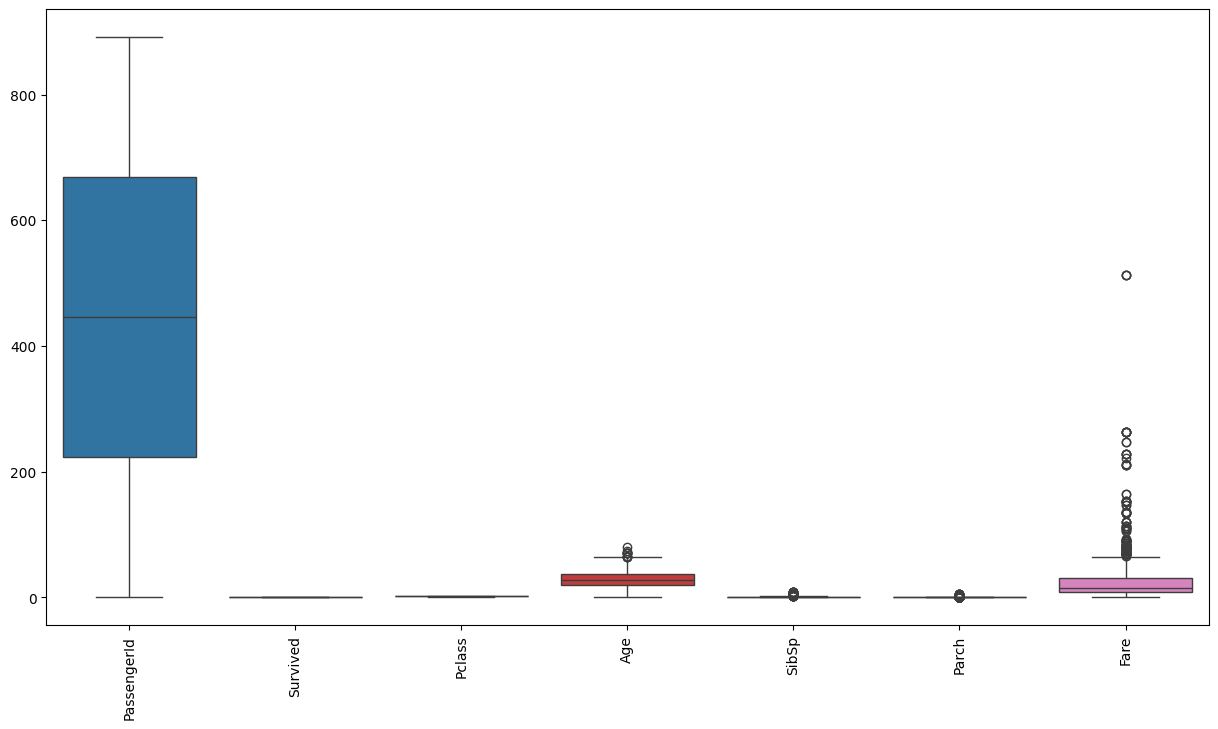

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(data=titanic, orient='v')
plt.xticks(rotation=90)
plt.show()

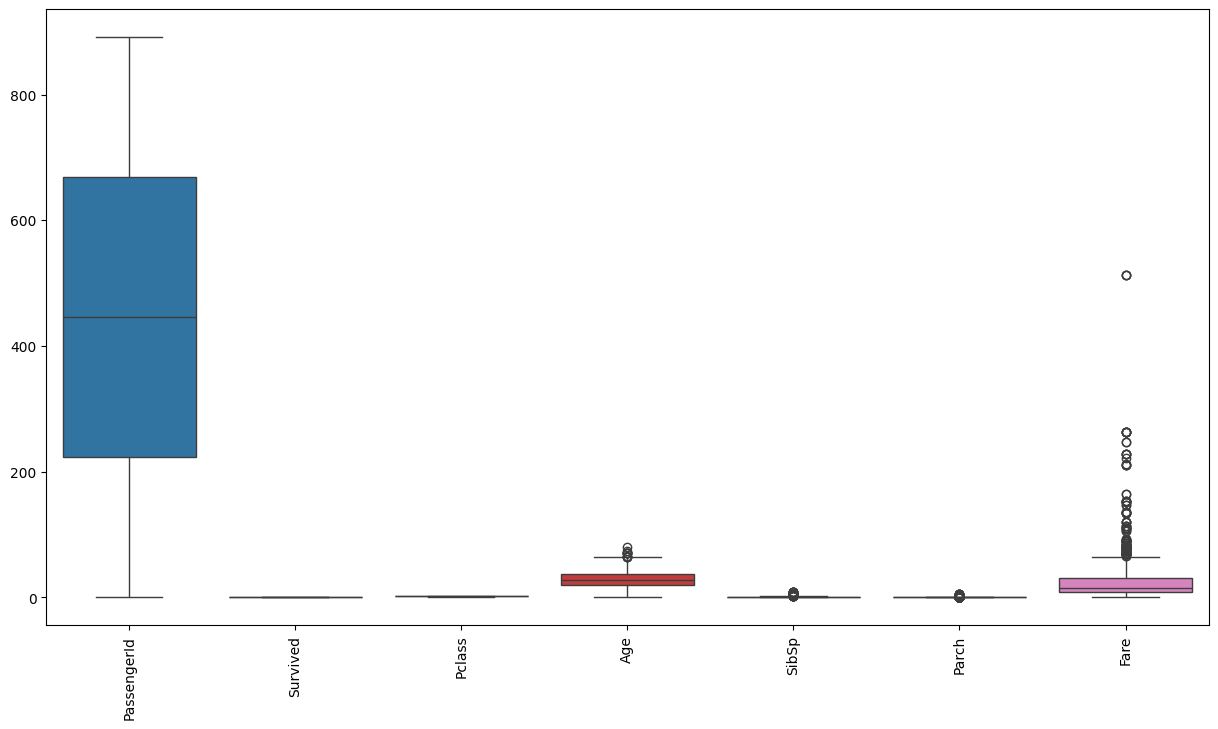

In [41]:
# Check Data After Removing Outlier
plt.figure(figsize=(15,8))
sns.boxplot(data=titanic, orient='v')
plt.xticks(rotation=90)
plt.show()

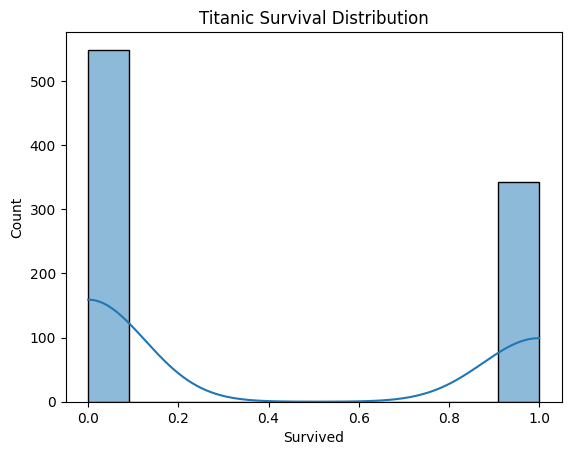

In [45]:
# Flood Probability Data Distribution
sns.histplot(x='Survived', data=titanic, kde=True) # Use a valid column name like 'Survived'
plt.title("Titanic Survival Distribution") # Adjusted the title
plt.show()

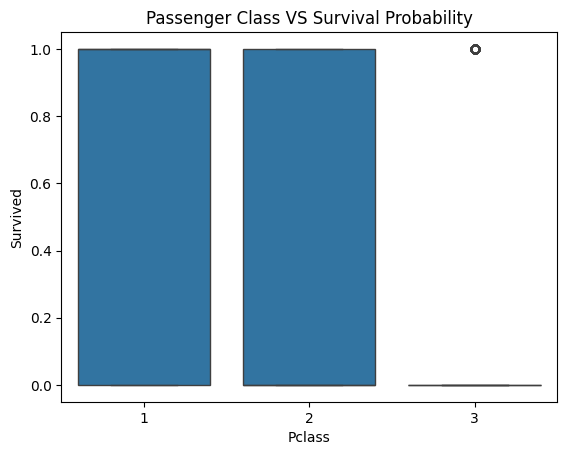

In [47]:
# Assuming 'Pclass' is what you meant to use
sns.boxplot(x=titanic['Pclass'], y=titanic['Survived'], data=titanic)  # Assuming 'Survived' is a valid column
plt.title("Passenger Class VS Survival Probability")
plt.show()

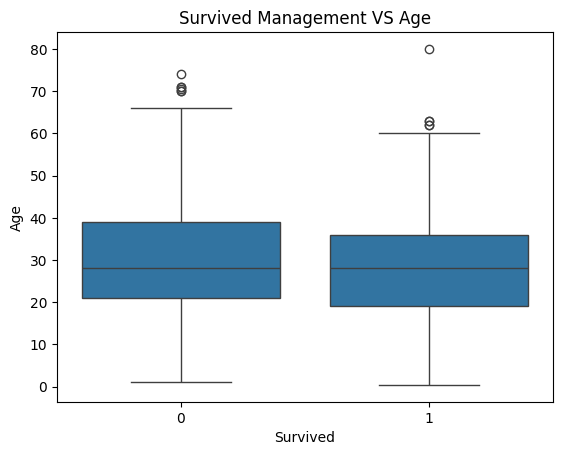

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'titanic' is a pandas DataFrame that you have loaded previously
# If not, load the data into the 'titanic' variable here

# Replace 'titanicProbability' with the correct column name if it exists
# If it doesn't exist, you'll need to calculate or load the data for this column
sns.boxplot(x=titanic['Survived'], y=titanic['Age'], data=titanic)  # Example: Using 'Age' column instead
plt.title("Survived Management VS Age")  # Adjusted the title for clarity
plt.show()

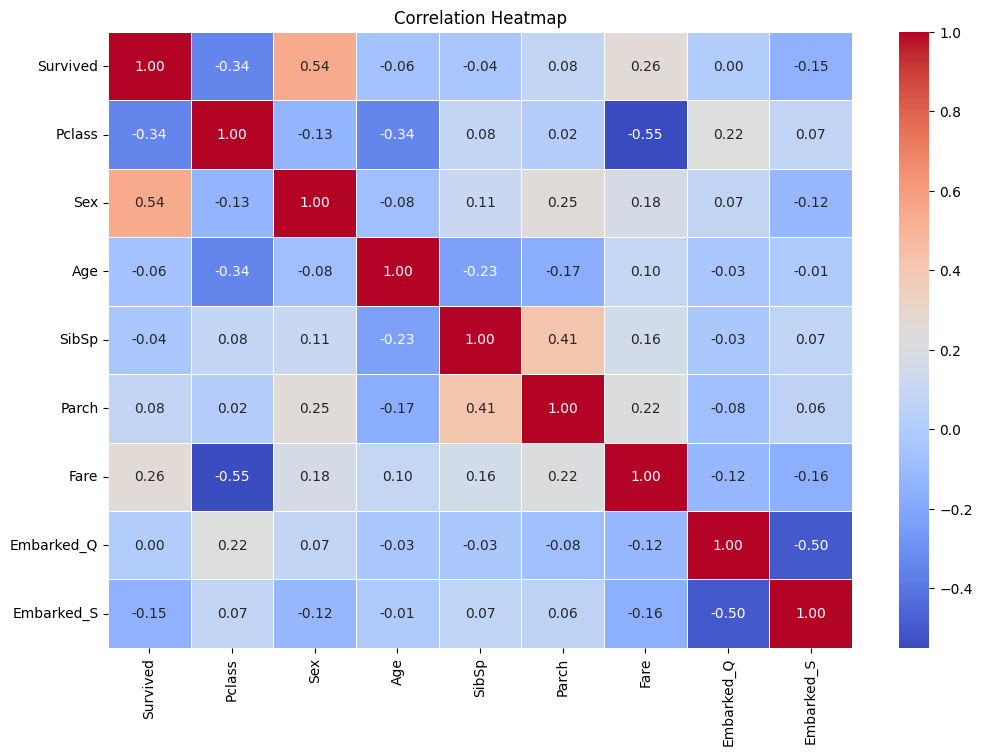

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/archive (3).zip'
data = pd.read_csv(data_path)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


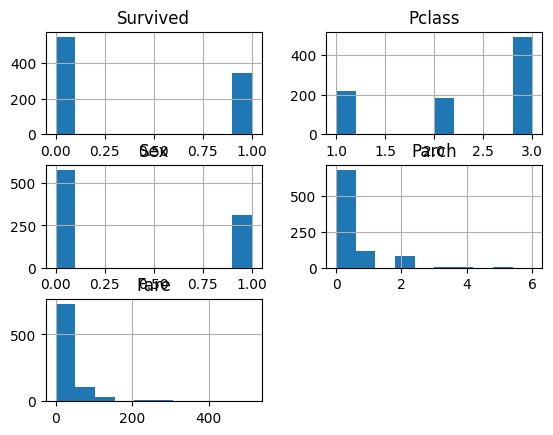

In [65]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['Survived','Pclass','Sex','Parch','Fare','Embarked_Q','Embarked_S']]
c.hist()
plt.show()


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Load the dataset
data_path = '/content/archive (3).zip'
data = pd.read_csv(data_path)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# Initialize individual classifiers for Voting Classifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

# Add Voting Classifier
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))

# Train and evaluate models
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

# Create DataFrame to display the results
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  Name     Score
0  KNN  0.698324
1   LR  0.810056
2   DT  0.787709
3   RF  0.798883
4   EL  0.804469


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  Name     Score
0  KNN  0.698324
1   LR  0.810056
2   DT  0.782123
3   RF  0.815642
4   EL  0.804469


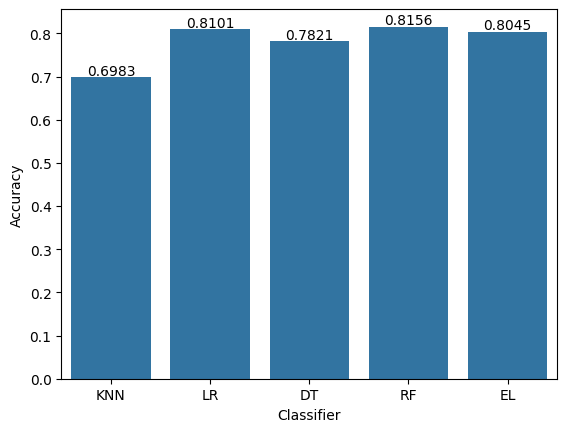

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Load the dataset
data_path = '/content/archive (3).zip'  # Adjust the path as necessary
data = pd.read_csv(data_path)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# Initialize individual classifiers for Voting Classifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

# Add Voting Classifier
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))

# Train and evaluate models
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

# Create DataFrame to display the results
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

# Visualize the results with a bar plot
axis = sns.barplot(x='Name', y='Score', data=tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()


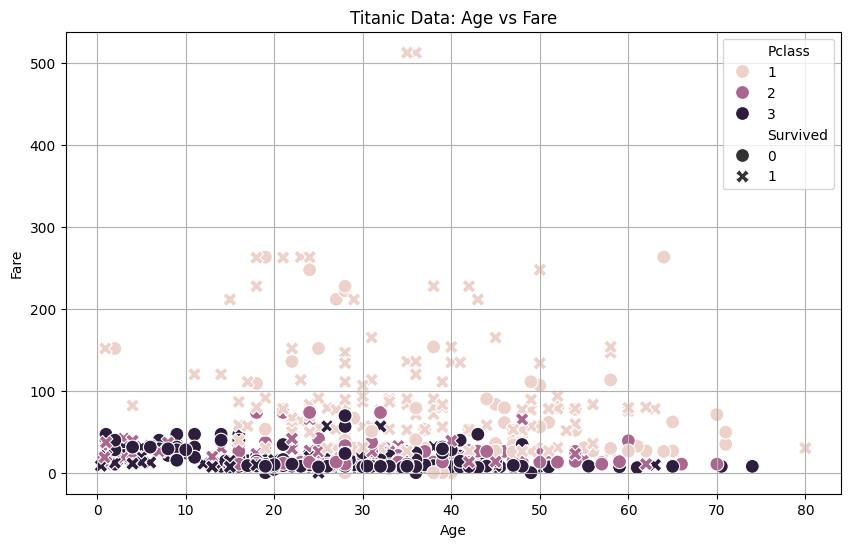

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/archive (3).zip'  # Adjust the path as necessary
data = pd.read_csv(data_path)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', style='Survived', data=data, s=100)
plt.title('Titanic Data: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


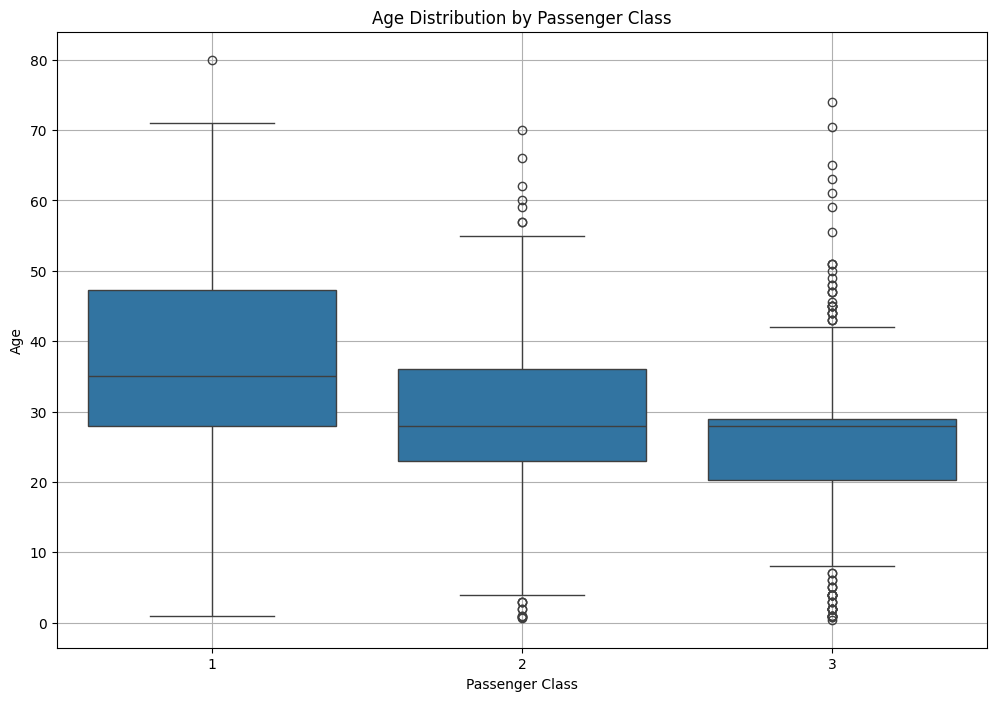

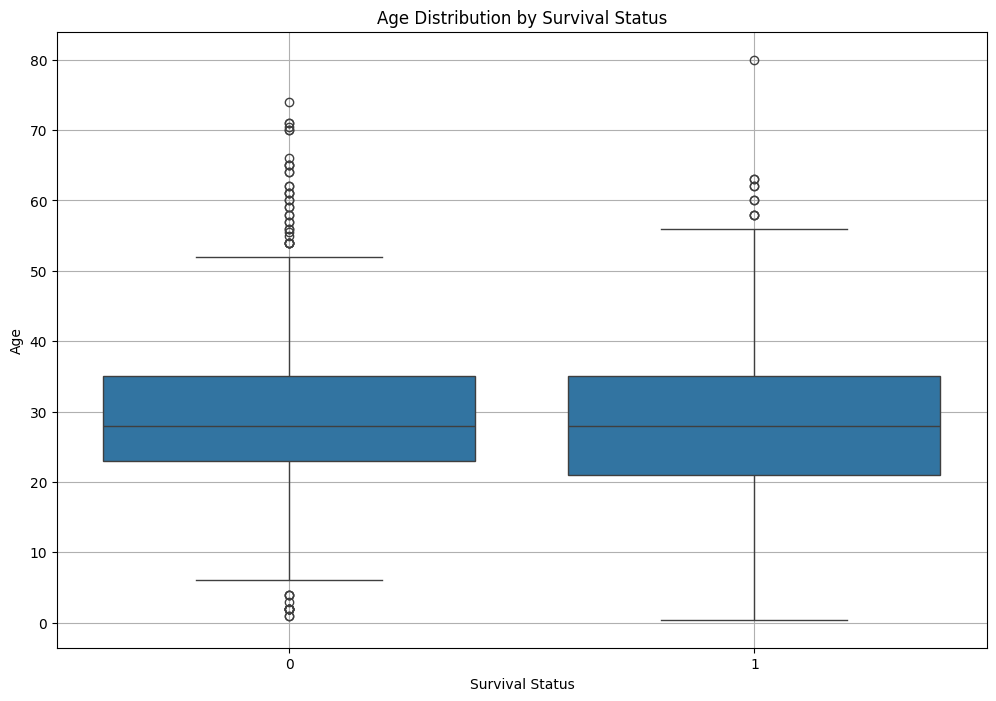

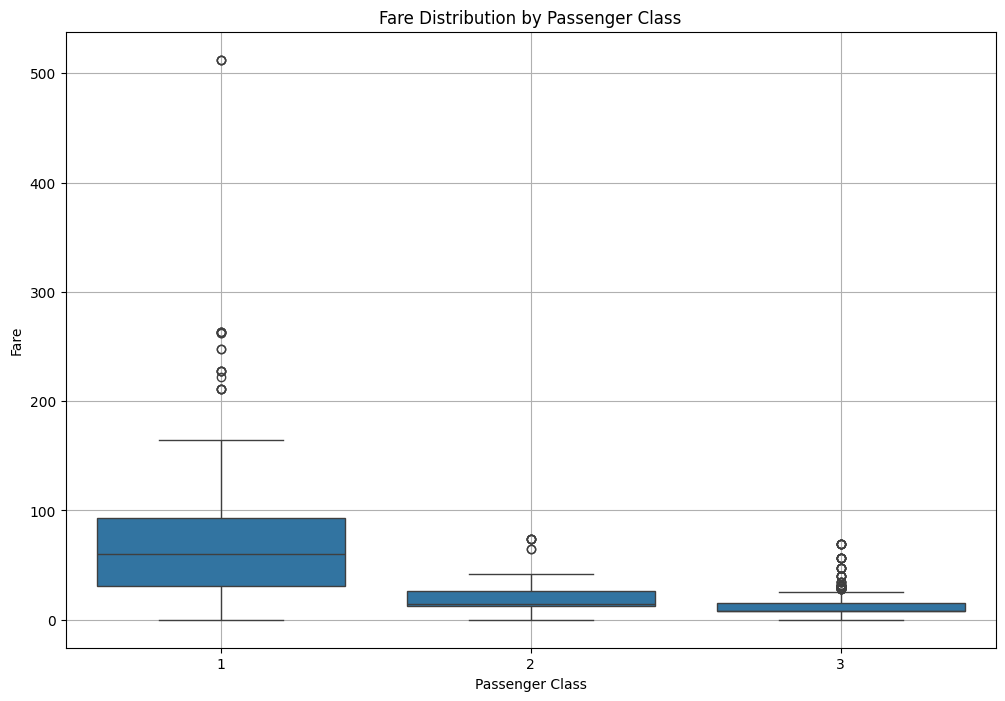

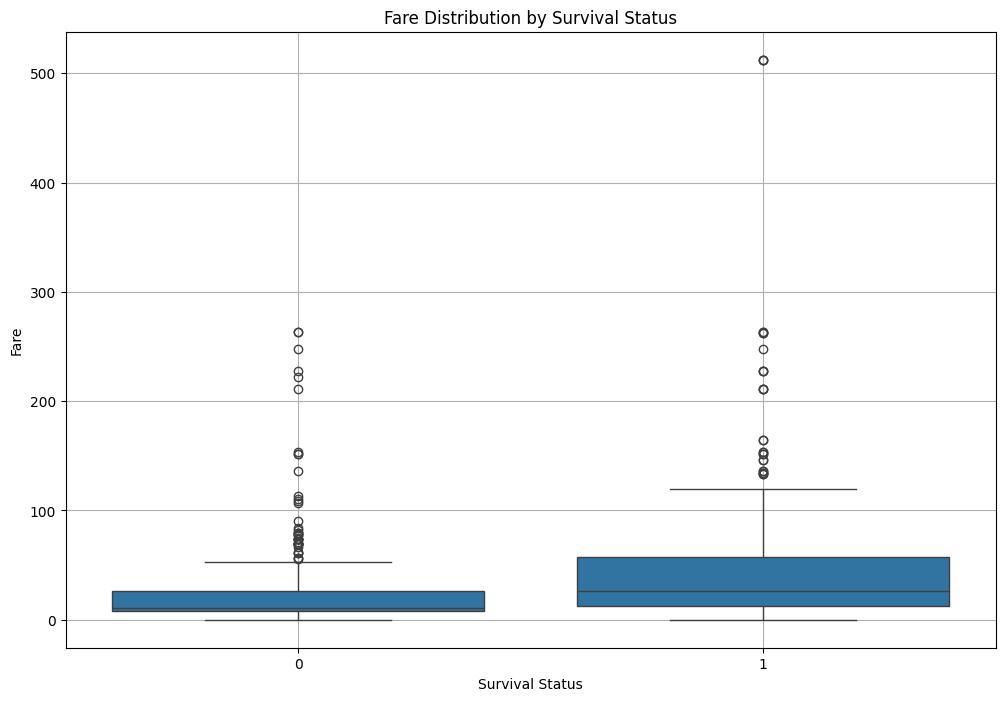

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/archive (3).zip'  # Adjust the path as necessary
data = pd.read_csv(data_path)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Box plot for Age by Pclass
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Box plot for Age by Survived
plt.figure(figsize=(12, 8))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Box plot for Fare by Pclass
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# Box plot for Fare by Survived
plt.figure(figsize=(12, 8))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.grid(True)
plt.show()
